In [2]:
import os
import pandas as pd
import librosa
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [3]:
directory=os.listdir('AudioWAV/')
print(len(directory))

7442


In [4]:
emotion= []
path= []
for audio_file in directory:
    if "ANG" in audio_file:
        emotion.append("Angry")
        path.append("AudioWAV/"+str(audio_file))
    if "HAP" in audio_file:
        emotion.append("Happy")
        path.append("AudioWAV/"+str(audio_file))
    if "SAD" in audio_file:
        emotion.append("Sad")
        path.append("AudioWAV/"+str(audio_file))
    if "FEA" in audio_file:
        emotion.append("Fear")
        path.append("AudioWAV/"+str(audio_file))
    if "DIS" in audio_file:
        emotion.append("Disgust")
        path.append("AudioWAV/"+str(audio_file))

In [34]:
ID = [(file.split("/"))[1][:4] for file in path]
Phrase = [(file.split("_"))[1] for file in path]
Emotion = [(file.split("_"))[2] for file in path]
Level = [(file.split("_"))[3][:2] for file in path]

In [35]:
F_ID = ['1002','1003','1004','1006','1007','1008','1009','1010','1012','1013','1018','1020','1021','1024','1025','1028',
        '1029','1030','1037','1043','1046','1047','1049','1052','1053','1054','1055','1056','1058','1060','1061','1063',
        '1072','1073','1074','1075','1076','1078','1079','1082','1084','1089','1091']
Gender=[]

for i in range(0,len(ID)):
    if ID[i] in F_ID:
        Gender.append('Female')
    else:
        Gender.append('Male')

In [36]:
df = pd.DataFrame({
    'Emotion': emotion,
    'Path': path,
    'ID':ID,
    'Phrase':Phrase,
    'Level':Level,
    'Gender':Gender
})

In [9]:
df["Emotion"].unique()

array(['Angry', 'Disgust', 'Fear', 'Happy', 'Sad'], dtype=object)

In [11]:
file='AudioWAV/1007_DFA_DIS_XX.wav'

In [32]:
audio, sampling_rate = librosa.load(file)
print(audio)
print(sampling_rate)

[ 0.00599887  0.00653347  0.00506197 ... -0.00017508 -0.00013229
  0.        ]
22050


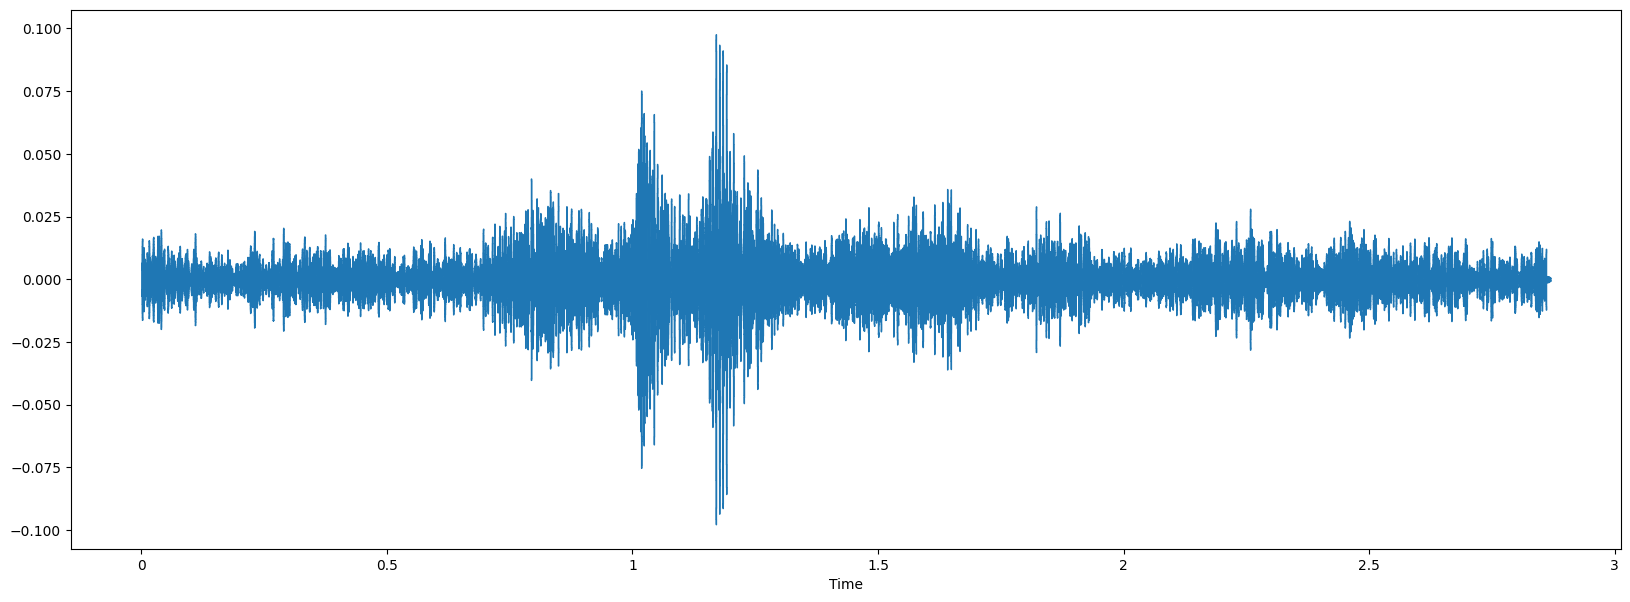

In [33]:
plt.figure(figsize=(20, 7))
librosa.display.waveshow(audio, sr=sampling_rate)

In [12]:
def feature_MFCC_Delta(file_path):
    audio_file=file_path
    audio, sample_rate=librosa.load(audio_file)
    mfcc = librosa.feature.mfcc(y=audio, sr=44100,n_mfcc=30,n_fft = 2048)
    delta_mfcc = librosa.feature.delta(mfcc)
    mfcc_delta = np.concatenate((mfcc, delta_mfcc), axis=0)
    mfcc_delta_list = zip(*mfcc_delta)
    averages = [sum(sublist)/len(sublist) for sublist in mfcc_delta_list]
    return averages,mfcc,mfcc_delta
feature_MFCC_Delta(file)

([-4.522652480875452,
  -3.67213759260873,
  -3.8117963074396055,
  -4.187453913564483,
  -3.697329324359695,
  -4.170580638945102,
  -4.511812061296466,
  -4.10148632794929,
  -4.354975780441115,
  -4.047257184693202,
  -3.7155755792598937,
  -4.2423546225919075,
  -4.19560407975999,
  -4.3636215840194685,
  -4.277990429662168,
  -4.591938370466233,
  -4.570875659088293,
  -4.160667418362573,
  -3.8356626372163496,
  -3.7835578952683138,
  -3.5152908543357624,
  -4.062937565460258,
  -4.715026453059788,
  -5.297408305151233,
  -5.428053296357393,
  -4.745692648366093,
  -4.491117304811875,
  -4.067843807023019,
  -3.422674199473113,
  -3.269632359283666,
  -3.774568247461381,
  -3.5673858214169742,
  -3.7706437966786326,
  -3.234095127880573,
  -3.1462047837674616,
  -3.638346701581031,
  -3.497169072677692,
  -3.747282671680053,
  -3.9214111918893955,
  -3.4041385553777217,
  -3.757079672689239,
  -4.121007233361403,
  -3.7233413805874687,
  -3.788750424608588,
  -3.431840116530657,


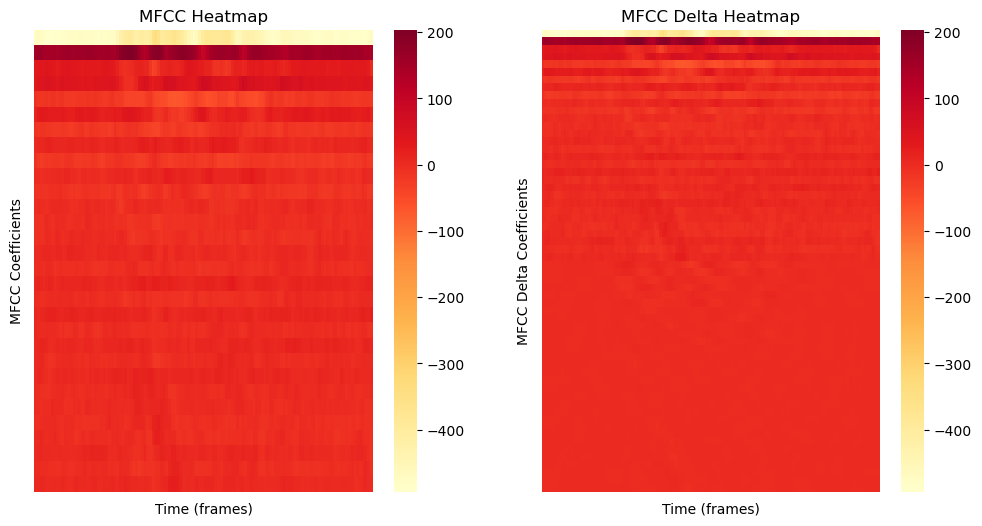

In [13]:
average_matrix,mfcc_matrix, mfcc_delta_matrix = feature_MFCC_Delta(file)
mfcc_df = pd.DataFrame(mfcc_matrix)
mfcc_delta_df = pd.DataFrame(mfcc_delta_matrix)

fig, axs = plt.subplots(ncols=2, figsize=(12, 6))
sns.heatmap(mfcc_df, cmap='YlOrRd', xticklabels=False, yticklabels=False, ax=axs[0])
axs[0].set_title('MFCC Heatmap')
axs[0].set_xlabel('Time (frames)')
axs[0].set_ylabel('MFCC Coefficients')
sns.heatmap(mfcc_delta_df, cmap='YlOrRd', xticklabels=False, yticklabels=False, ax=axs[1])
axs[1].set_title('MFCC Delta Heatmap')
axs[1].set_xlabel('Time (frames)')
axs[1].set_ylabel('MFCC Delta Coefficients')
plt.show()

In [14]:
def feature_spectral_contrast(file_path):
    audio_file=file_path
    audio, sample_rate=librosa.load(audio_file)
    spectral_contrast = librosa.feature.spectral_contrast(y=audio, sr=44100,n_fft = 2048)
    spectral_contrast_list = zip(*spectral_contrast)
    averages = [sum(sublist)/len(sublist) for sublist in spectral_contrast_list]
    return averages
feature_spectral_contrast(file)

[11.247836690242211,
 14.353837779030325,
 20.558099628710718,
 20.310159849532567,
 19.979623258516053,
 20.580417217510128,
 19.14170170345273,
 19.44794746716081,
 17.84712098973373,
 19.92433973528286,
 20.52735523057672,
 21.545713410721664,
 19.695487675715807,
 20.015091990506953,
 20.259402623760064,
 20.343561222290468,
 22.169286188946213,
 21.99761054347826,
 19.33867704349117,
 18.78503013412567,
 19.517496322825625,
 19.965294350866607,
 18.87684136804329,
 18.724089636971932,
 21.711838097991315,
 21.833896372620465,
 19.544387381853692,
 20.34035966329922,
 19.715086125246838,
 20.335283367621006,
 20.52506787433877,
 19.97485122679522,
 19.946979534055224,
 21.07490355546388,
 21.556375245675003,
 21.717217880261654,
 24.309082580856956,
 23.392807230818786,
 22.93658408408414,
 23.404044708651092,
 23.02180099580737,
 20.024583171703473,
 22.11662311694928,
 25.297776374834854,
 23.59181611616341,
 23.072959924756102,
 23.353542844309953,
 23.088109549846674,
 23.37130

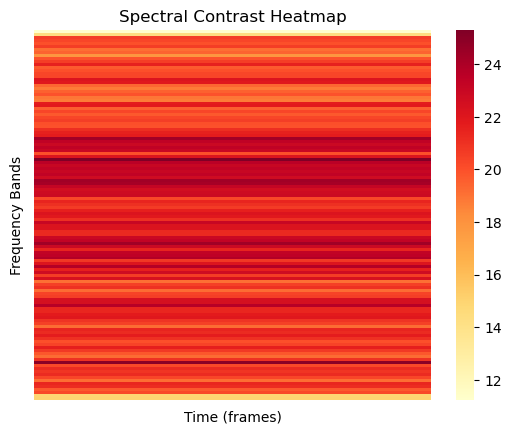

In [15]:
spectral_contrast_matrix = feature_spectral_contrast(file)
spec_df = pd.DataFrame(spectral_contrast_matrix)

sns.heatmap(spec_df, cmap='YlOrRd', xticklabels=False, yticklabels=False)
plt.title('Spectral Contrast Heatmap')
plt.xlabel('Time (frames)')
plt.ylabel('Frequency Bands')
plt.show()

In [16]:
def feature_concat(file):
    mfcc_delta=feature_MFCC_Delta(file)[0]
    #zero_crossing=feature_zero_crossing(file)
    #chroma=feature_chroma(file)
    spectral_contrast=feature_spectral_contrast(file)
    #mel_spectpgraph=feature_mel_spectograph(file)
    #features = np.concatenate((mfcc_delta, spectral_contrast, chroma, zero_crossing,mel_spectpgraph), axis=0)
    features = np.concatenate((mfcc_delta,spectral_contrast), axis=0)
    return features
    
feature_concat(file)

array([-4.52265248, -3.67213759, -3.81179631, -4.18745391, -3.69732932,
       -4.17058064, -4.51181206, -4.10148633, -4.35497578, -4.04725718,
       -3.71557558, -4.24235462, -4.19560408, -4.36362158, -4.27799043,
       -4.59193837, -4.57087566, -4.16066742, -3.83566264, -3.7835579 ,
       -3.51529085, -4.06293757, -4.71502645, -5.29740831, -5.4280533 ,
       -4.74569265, -4.4911173 , -4.06784381, -3.4226742 , -3.26963236,
       -3.77456825, -3.56738582, -3.7706438 , -3.23409513, -3.14620478,
       -3.6383467 , -3.49716907, -3.74728267, -3.92141119, -3.40413856,
       -3.75707967, -4.12100723, -3.72334138, -3.78875042, -3.43184012,
       -3.9943528 , -3.69485944, -3.2605313 , -3.4857007 , -3.77547103,
       -3.76669317, -3.9230552 , -3.76277652, -3.98169897, -4.35212729,
       -4.60353156, -4.61000365, -5.20771932, -4.75712739, -4.73351334,
       -4.6703981 , -3.74863948, -3.66700391, -3.54061197, -3.43060341,
       -3.44571893, -3.83832421, -3.58546902, -3.3505772 , -3.25

In [39]:
print(len(directory))  

7442


In [40]:
feature=[]
for data in directory:
    if "NEU" in data:
        continue
    else:
        data="AudioWAV/"+str(data)
        f=feature_concat(data)
        feature.append(f)


In [41]:
df = pd.DataFrame({'Emotion': emotion,
                   'Path': path})

In [25]:
feature_df=pd.DataFrame({"Feature":feature})

In [24]:
df.head()

,Emotion,Path,ID,Phrase,Level,Gender
0,Angry,AudioWAV/1001_DFA_ANG_XX.wav,1001,DFA,XX,Male
1,Disgust,AudioWAV/1001_DFA_DIS_XX.wav,1001,DFA,XX,Male
2,Fear,AudioWAV/1001_DFA_FEA_XX.wav,1001,DFA,XX,Male
3,Happy,AudioWAV/1001_DFA_HAP_XX.wav,1001,DFA,XX,Male
4,Sad,AudioWAV/1001_DFA_SAD_XX.wav,1001,DFA,XX,Male


In [26]:
feature_df.head()

,Feature
0,"[-10.380790142544235, -8.481638709331552, -7.8..."
1,"[-7.071232598585387, -6.298779859455923, -6.12..."
2,"[-6.859945488472779, -7.003794906909267, -7.28..."
3,"[-6.569191958537946, -7.128181027155369, -7.90..."
4,"[-6.8813249812151, -6.750297260843217, -6.9560..."


In [27]:
df = pd.concat([df,pd.DataFrame(feature_df['Feature'].values.tolist())],axis=1)

In [28]:
df.head()

,Emotion,Path,ID,Phrase,Level,Gender,0,1,2,3,...,422,423,424,425,426,427,428,429,430,431
0,Angry,AudioWAV/1001_DFA_ANG_XX.wav,1001,DFA,XX,Male,-10.380790,-8.481639,-7.820174,-6.929501,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Disgust,AudioWAV/1001_DFA_DIS_XX.wav,1001,DFA,XX,Male,-7.071233,-6.298780,-6.121634,-6.196293,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fear,AudioWAV/1001_DFA_FEA_XX.wav,1001,DFA,XX,Male,-6.859945,-7.003795,-7.288561,-7.314611,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Happy,AudioWAV/1001_DFA_HAP_XX.wav,1001,DFA,XX,Male,-6.569192,-7.128181,-7.901692,-7.403987,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Sad,AudioWAV/1001_DFA_SAD_XX.wav,1001,DFA,XX,Male,-6.881325,-6.750297,-6.956024,-7.039661,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
df = df.fillna(0)

In [30]:
df.head()

,Emotion,Path,ID,Phrase,Level,Gender,0,1,2,3,...,422,423,424,425,426,427,428,429,430,431
0,Angry,AudioWAV/1001_DFA_ANG_XX.wav,1001,DFA,XX,Male,-10.380790,-8.481639,-7.820174,-6.929501,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Disgust,AudioWAV/1001_DFA_DIS_XX.wav,1001,DFA,XX,Male,-7.071233,-6.298780,-6.121634,-6.196293,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Fear,AudioWAV/1001_DFA_FEA_XX.wav,1001,DFA,XX,Male,-6.859945,-7.003795,-7.288561,-7.314611,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Happy,AudioWAV/1001_DFA_HAP_XX.wav,1001,DFA,XX,Male,-6.569192,-7.128181,-7.901692,-7.403987,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Sad,AudioWAV/1001_DFA_SAD_XX.wav,1001,DFA,XX,Male,-6.881325,-6.750297,-6.956024,-7.039661,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
